In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

# Table of contents

* [Dummy Regression](#Dummy Regression)
* [Linear Regression](#Linear Regression)
* [Decision Tree Regression](#Decision Tree Regression)

In [2]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')

    return res

In [3]:
data= pd.read_csv('cleaned_data.csv', sep=',')

In [4]:
data

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,Distribution Center,...,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,North,Northwest,SOUTHEAST,SOUTHWEST,Building_age
0,1,1.0,12,88434,249.98,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,89
1,2,1.0,11,103566,295.86,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20
2,5,1.0,10,61320,286.43,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,90
3,8,1.0,18,175580,505.01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,9,1.0,2,97288,301.81,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,50069,1.0,2,24990,134.80,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,87
1479,50070,1.0,1,72000,67.65,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1480,50081,1.0,3,45000,9.24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1481,50196,1.0,1,20616,4.44,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OSEBuildingID                1483 non-null   int64  
 1   NumberofBuildings            1483 non-null   float64
 2   NumberofFloors               1483 non-null   int64  
 3   PropertyGFATotal             1483 non-null   int64  
 4   TotalGHGEmissions            1483 non-null   float64
 5   Campus                       1483 non-null   int64  
 6   NonResidential               1483 non-null   int64  
 7   Nonresidential COS           1483 non-null   int64  
 8   SPS-District K-12            1483 non-null   int64  
 9   Distribution Center          1483 non-null   int64  
 10  Hospital                     1483 non-null   int64  
 11  Hotel                        1483 non-null   int64  
 12  K-12 School                  1483 non-null   int64  
 13  Laboratory        

In [6]:
corrMatrix = data.corr(method='spearman')

In [7]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.7) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,Distribution Center,Hospital,Hotel,K-12 School,Laboratory,Large Office,Medical Office,Mixed Use Property,Office,Other,Refrigerated Warehouse,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility,District_1,District_2,District_3,District_4,District_5,District_6,District_7,BALLARD,Ballard,CENTRAL,Central,DELRIDGE,DELRIDGE NEIGHBORHOODS,DOWNTOWN,Delridge,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,North,Northwest,SOUTHEAST,SOUTHWEST,Building_age
OSEBuildingID,1.000000,-0.014072,-0.294925,-0.541099,-0.288549,0.015719,0.060606,0.029203,-0.112573,-0.023061,0.029307,-0.178793,-0.049106,-0.009510,-0.223843,-0.021881,0.051920,nan,0.048742,0.045817,0.082506,0.033722,-0.003424,-0.002710,0.053093,0.049306,0.071589,0.040217,0.062184,0.092412,0.029554,0.084385,0.131386,0.086797,0.003299,-0.005128,-0.241582,0.013463,0.002357,0.053432,0.078171,-0.008663,nan,-0.195745,-0.016673,0.122885,0.079837,-0.064266,-0.025038,0.002963,0.077534,-0.019633,0.046787,0.019945,0.016914,0.017435,0.029708
NumberofBuildings,-0.014072,1.000000,-0.033669,0.030520,0.050048,0.277259,-0.066844,-0.037474,0.003771,0.033810,-0.108308,0.016135,0.034187,0.000843,-0.004726,-0.016452,-0.007228,nan,0.069924,-0.030182,-0.022141,-0.031627,-0.033763,0.047419,0.001607,-0.057972,-0.032879,0.080006,-0.012735,-0.010935,-0.006663,0.027706,-0.021505,0.041632,-0.006268,0.014740,-0.039095,0.031628,0.000924,0.069284,0.000754,-0.015195,nan,-0.055363,0.000754,-0.072872,0.048881,-0.015088,0.014274,0.002083,0.056891,-0.009267,-0.035193,0.000843,0.002443,-0.033359,-0.042374
NumberofFloors,-0.294925,-0.033669,1.000000,0.452481,0.190102,-0.030668,0.164953,-0.114259,-0.108930,-0.186485,0.010163,0.270437,-0.090431,0.002817,0.420461,0.064298,0.008699,nan,-0.111126,-0.092276,0.023588,0.008005,-0.131922,0.014790,0.032320,0.173038,-0.157528,0.022909,-0.296379,-0.082557,-0.189669,-0.311761,0.056393,-0.002372,-0.094887,-0.067250,0.452917,-0.068900,-0.015433,-0.025718,0.044943,-0.115370,nan,0.449214,-0.043671,0.076841,-0.392943,0.146775,0.053416,-0.046473,-0.025614,-0.089163,-0.016570,-0.011101,-0.078279,-0.072767,-0.051571
PropertyGFATotal,-0.541099,0.030520,0.452481,1.000000,0.496752,0.045435,-0.062240,-0.055126,0.111076,-0.021338,0.004854,0.126523,0.043639,0.000761,0.456865,0.052318,-0.047476,nan,-0.074764,-0.070097,-0.023663,-0.073226,-0.033095,-0.008638,0.049166,-0.158530,-0.029677,0.026863,-0.068457,-0.181576,-0.052653,-0.074101,-0.034317,-0.047976,-0.034118,-0.079170,0.218206,-0.080402,-0.045632,-0.039440,-0.005178,-0.015668,nan,0.189804,0.028912,-0.035298,-0.092501,0.103926,0.007376,-0.048240,-0.046838,-0.013535,0.004299,-0.032607,-0.010847,-0.049568,-0.271420
TotalGHGEmissions,-0.288549,0.050048,0.190102,0.496752,1.000000,0.113641,-0.123171,0.082906,0.044935,-0.088239,-0.030035,0.209192,0.059448,0.069996,0.222066,0.030110,-0.008297,nan,0.106615,-0.066062,0.023143,0.058944,-0.020774,-0.097881,0.108603,-0.264299,0.179445,0.027359,-0.199444,-0.083443,-0.003669,-0.143280,0.050332,-0.004363,0.013576,-0.041337,0.118514,-0.015060,-0.055445,-0.003839,0.014638,0.007676,nan,0.093540,-0.014972,0.057288,-0.147817,0.025080,-0.020173,-0.014673,0.033531,0.029667,0.012260,-0.014768,-0.006503,0.003688,-0.120834
Campus,0.015719,0.277259,-0.030668,0.045435,0.113641,1.000000,-0.282774,-0.022894,-0.027168,-0.019305,-0.002713,-0.022717,0.058154,-0.006074,-0.012403,-0.016473,0.050004,nan,0.067571,-0.009433,-0.012516,0.067043,-0.025102,-0.012815,-0.011576,-0.050162,-0.017163,0.050070,-0.037203,-0.021997,0.045163,-0.013761,0.023887,-0.013963,-0.030847,-0.029269,0.014473,-0.021069,-0.006656,0.059753,-0.005431,0.022903,nan,0.027397,-0.005431,-0.003380,0.026165,-0.032780,-0.010777,-0.019908,-0.005391,-0.023933,-0.008161,-0.00

In [8]:
features = data.columns.to_list()
features.remove('TotalGHGEmissions')

In [9]:
features

['OSEBuildingID',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'Campus',
 'NonResidential',
 'Nonresidential COS',
 'SPS-District K-12',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Medical Office',
 'Mixed Use Property',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility',
 'District_1',
 'District_2',
 'District_3',
 'District_4',
 'District_5',
 'District_6',
 'District_7',
 'BALLARD',
 'Ballard',
 'CENTRAL',
 'Central',
 'DELRIDGE',
 'DELRIDGE NEIGHBORHOODS',
 'DOWNTOWN',
 'Delridge',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'North',
 'Northwest',
 'SOUTHEAST',
 'SOUTHWEST',
 'Building_age']

In [10]:
X = data[features]
y = data['TotalGHGEmissions']

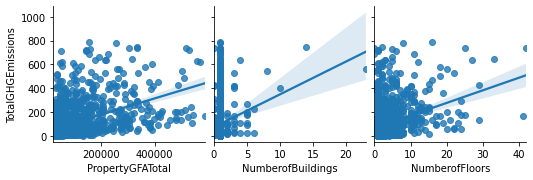

In [11]:
sns.pairplot(data,
             x_vars=['PropertyGFATotal',
                     'NumberofBuildings',
                     'NumberofFloors'],
             y_vars='TotalGHGEmissions',
             kind='reg')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape: (1038, 56)
X_test shape:  (445, 56)
y_train shape: (1038,)
y_test shape : (445,)


In [13]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [14]:
X_train

array([[-1.14052437, -0.08383201,  0.09044959, ..., -0.18120657,
        -0.16028631,  0.94624638],
       [ 0.28767001, -0.08383201, -0.39225824, ..., -0.18120657,
        -0.16028631,  1.30648983],
       [ 0.6104326 , -0.08383201, -0.39225824, ...,  5.51856371,
        -0.16028631,  1.45659126],
       ...,
       [ 0.44513721, -0.08383201, -0.63361216, ..., -0.18120657,
        -0.16028631,  1.45659126],
       [ 2.56371837, -0.08383201,  0.09044959, ..., -0.18120657,
        -0.16028631, -0.25456509],
       [ 0.65649853, -0.08383201, -0.15090433, ..., -0.18120657,
        -0.16028631, -1.18519399]])

# Dummy Regression

In [15]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [16]:
y_pred = dummy_regressor.predict(X_test)
y_pred[:10]

array([103.75296724, 103.75296724, 103.75296724, 103.75296724,
       103.75296724, 103.75296724, 103.75296724, 103.75296724,
       103.75296724, 103.75296724])

In [17]:
print('R2 train score:', dummy_regressor.score(X_train, y_train).round(4))
print('R2 test score :' , dummy_regressor.score(X_test, y_test).round(4))
print()
print('MAE  test (Mean Absolute Error):    ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error):     ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.0
R2 test score : -0.0004

MAE  test (Mean Absolute Error):     90.86463103201923
MSE  test (Mean Squared Error):      16602.484075950088
RMSE test (Root Mean Squared Error): 128.85062699090793


# Linear Regression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

103.85528017505428
[-1.47879623e+01  1.51375548e+01  1.49832657e+01  6.00624204e+01
  3.66280524e+14  1.02627307e+15  6.53483434e+14  7.58180156e+14
 -4.46171058e+14 -7.46574020e+13 -4.95242887e+14 -6.70326878e+14
 -1.29185657e+14 -7.19462086e+14 -3.68942105e+14 -5.99473416e+14
  1.91716881e+14 -8.55401461e+14 -1.96952658e+14 -2.67619099e+14
 -1.96952658e+14 -5.57186835e+14 -3.05436424e+14 -2.57245507e+14
 -9.39971287e+14 -3.68942105e+14 -2.57245507e+14 -7.77761780e+14
 -4.74174079e+14 -2.85050453e+14 -4.90524644e+14 -3.59758083e+14
 -3.33181396e+14 -3.07959180e+14 -2.90558578e+14 -5.24983218e+14
  1.52892623e+14  4.26404781e+13  1.30898854e+14  4.26404781e+13
  1.14406173e+14 -5.48239387e+14  3.29369413e+14  4.26404781e+13
  2.05652995e+14  3.24622977e+14  2.20110697e+14  2.30118922e+14
  1.56511257e+14  2.05652995e+14  1.61760375e+14  5.49954078e+13
  5.49954078e+13  1.39357795e+14  1.24127553e+14  3.75000000e+00]


In [20]:
y_pred_train = lin_reg.predict(X_train)
print(y_pred_train[:10])

y_pred = lin_reg.predict(X_test)
print(y_pred[:10])

[110.45839162  96.59055453  66.13780991  34.17432092 171.1315658
  90.63986985 180.76594668  93.69780529  96.55550073  80.85096538]
[119.13004428 101.68424023   2.28141364 131.79307681 -13.25021674
 130.25884807 183.28141364 294.62059909 226.95908807  33.36838111]


In [21]:
print('R2 train score:', lin_reg.score(X_train, y_train).round(4))
print('R2 test score :' , lin_reg.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.4463
R2 test score : 0.3434

MAE  train (Mean Absolute Error)    : 64.05624771367295
MSE  train (Mean Squared Error)     : 10037.57951078081
RMSE train (Root Mean Squared Error): 100.187721357364

MAE  test (Mean Absolute Error)    : 67.31005492820476
MSE  test (Mean Squared Error)     : 10896.771697868588
RMSE test (Root Mean Squared Error): 104.38760318097445


## GridSearchCV

In [22]:
estimator = LinearRegression()

params = {
         }

In [23]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             return_train_score=True, verbose=3)

In [24]:
best_params = grid.best_params_
best_params

{}

In [25]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.014522,0.001395,0.000599,0.000489,{},-2.195529e+25,4.391058e+25,1,0.450799,0.015947


# Decision Tree Regression

In [26]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred_train = tree_reg.predict(X_train)
print(y_pred_train[:10])

y_pred = tree_reg.predict(X_test)
print(y_pred[:10])

[109.85  63.48 102.35  69.77 147.82   3.   101.5    6.32 237.36  89.29]
[101.34 177.62  54.44 111.23  20.96   4.8  265.21 214.19  34.14   9.13]


In [28]:
print('R2 train score:', tree_reg.score(X_train, y_train).round(4))
print('R2 test score :' , tree_reg.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 1.0
R2 test score : -0.2343

MAE  train (Mean Absolute Error)    : 0.0
MSE  train (Mean Squared Error)     : 0.0
RMSE train (Root Mean Squared Error): 0.0

MAE  test (Mean Absolute Error)    : 87.67797752808988
MSE  test (Mean Squared Error)     : 20483.144675056184
RMSE test (Root Mean Squared Error): 143.1193371807464


## GridSearchCV

In [29]:
estimator = DecisionTreeRegressor()

params = {'max_depth': [1, 2, 3, 5, 10]
         }

In [30]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10]},
             return_train_score=True, verbose=3)

In [31]:
best_params = grid.best_params_
best_params

{'max_depth': 3}

In [32]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
2,0.003769,0.000390,0.001225,0.000390,3,{'max_depth': 3},0.265728,0.014983,1,0.393056,0.008876
1,0.003765,0.001187,0.001226,0.000390,2,{'max_depth': 2},0.260747,0.057588,2,0.314686,0.008664
3,0.005794,0.000747,0.001199,0.000400,5,{'max_depth': 5},0.245559,0.059466,3,0.565477,0.027881
0,0.002167,0.000419,0.000399,0.000489,1,{'max_depth': 1},0.206989,0.030006,4,0.237261,0.009990
4,0.009389,0.001355,0.001199,0.000747,10,{'max_depth': 10},0.038639,0.126848,5,0.873700,0.013148


# Random Forest Regressor

In [33]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred_train = random_forest.predict(X_train)
print(y_pred_train[:10])

y_pred = random_forest.predict(X_test)
print(y_pred[:10])

[ 84.6024  60.6838  83.9926  58.5163 168.0561  33.6242 120.7098  16.533
 184.1627  84.7998]
[ 91.2299  96.0391  23.3857 170.9914  40.0675 123.5839 177.9325 205.5159
 148.1453  99.5502]


In [35]:
print('R2 train score:', random_forest.score(X_train, y_train).round(4))
print('R2 test score :' , random_forest.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.9161
R2 test score : 0.3459

MAE  train (Mean Absolute Error)    : 23.760663005780348
MSE  train (Mean Squared Error)     : 1520.2391784682663
RMSE train (Root Mean Squared Error): 38.990244657712346

MAE  test (Mean Absolute Error)    : 64.72905123595505
MSE  test (Mean Squared Error)     : 10855.191224855687
RMSE test (Root Mean Squared Error): 104.1882489768193


## GridSearchCV

In [57]:
estimator = RandomForestRegressor()

params = {'n_estimators': [200],
          'max_depth': [5, 10],
          'min_samples_split': [3],
          'max_leaf_nodes': [300, 400, 500, 600]
         }

In [58]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10],
                         'max_leaf_nodes': [300, 400, 500, 600],
                         'min_samples_split': [3], 'n_estimators': [200]},
             return_train_score=True, verbose=3)

In [59]:
best_params = grid.best_params_
best_params

{'max_depth': 10,
 'max_leaf_nodes': 600,
 'min_samples_split': 3,
 'n_estimators': 200}

In [60]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
7,1.185173,0.062661,0.025395,0.005959,10,600,200,"{'max_depth': 10, 'max_leaf_nodes': 600, 'min_...",0.411328,0.075261,1,0.833328,0.009805
4,1.324483,0.006253,0.032240,0.000964,10,300,200,"{'max_depth': 10, 'max_leaf_nodes': 300, 'min_...",0.410296,0.078307,2,0.832467,0.009488
5,1.314367,0.015767,0.032220,0.000634,10,400,200,"{'max_depth': 10, 'max_leaf_nodes': 400, 'min_...",0.407593,0.078669,3,0.831593,0.010091
6,1.316304,0.014097,0.032343,0.000203,10,500,200,"{'max_depth': 10, 'max_leaf_nodes': 500, 'min_...",0.404873,0.079290,4,0.832640,0.008470
3,0.863051,0.017585,0.030594,0.001044,5,600,200,"{'max_depth': 5, 'max_leaf_nodes': 600, 'min_s...",0.390463,0.073018,5,0.617971,0.018525
0,0.916162,0.028433,0.033041,0.004161,5,300,200,"{'max_depth': 5, 'max_leaf_nodes': 300, 'min_s...",0.390335,0.073063,6,0.616884,0.017744
2,0.876485,0.009723,0.030829,0.001036,5,500,200,"{'max_depth': 5, 'max_leaf_nodes': 500, 'min_s...",0.381319,0.069512,7,0.615404,0.016676
1,0.876810,0.007059,0.030824,0.001007,5,400,200,"{'max_depth': 5, 'max_leaf_nodes': 400, 'min_s...",0.380110,0.069342,8,0.616133,0.018398


### Test with best params

In [47]:
random_forest = RandomForestRegressor(max_depth=10,
                                      n_estimators=200,
                                      min_samples_split=3,
                                      max_leaf_nodes=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=100, min_samples_split=3,
                      n_estimators=200)

In [48]:
y_pred_train = random_forest.predict(X_train)
print(y_pred_train[:10])

y_pred = random_forest.predict(X_test)
print(y_pred[:10])

[ 63.04275163  48.43893535  56.00678208  46.25123083 155.55298961
  70.55959809 113.05604561  43.68552097 124.76240622  60.48346838]
[ 88.32743407 100.37340049  30.09090411 161.60259028  38.75268501
  92.91949306 165.06019008 191.71071314 141.4479453   92.12618477]


In [49]:
print('R2 train score:', random_forest.score(X_train, y_train).round(4))
print('R2 test score :' , random_forest.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.8231
R2 test score : 0.3601

MAE  train (Mean Absolute Error)    : 39.61673882157533
MSE  train (Mean Squared Error)     : 3207.667135936551
RMSE train (Root Mean Squared Error): 56.63627049812294

MAE  test (Mean Absolute Error)    : 63.57342516993639
MSE  test (Mean Squared Error)     : 10619.171699105997
RMSE test (Root Mean Squared Error): 103.04936535033099
